Now let's first import our dataset:

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("/Users/sai/Downloads/heart_2020_cleaned.csv")

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [80]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### No missing data.

In [81]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [82]:
df.describe(include = "object").T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [83]:
raw_df = df.copy()
df.drop_duplicates()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [84]:
df.shape

(319795, 18)

In [85]:
319795-301717

18078

In [86]:
df.drop_duplicates(inplace = True)

In [87]:
df.shape

(301717, 18)

### Let's check our data for outliers:

BMI                  AxesSubplot(0.125,0.125;0.168478x0.755)
PhysicalHealth    AxesSubplot(0.327174,0.125;0.168478x0.755)
MentalHealth      AxesSubplot(0.529348,0.125;0.168478x0.755)
SleepTime         AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

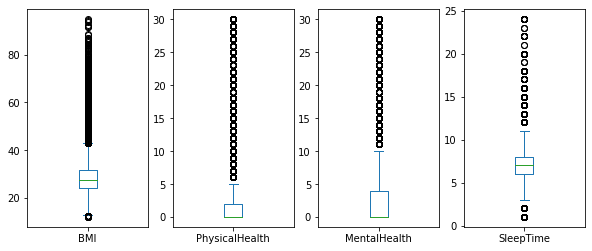

In [88]:
df.plot(kind = "box", figsize = (10,4), subplots = True)

<AxesSubplot:xlabel='BMI', ylabel='PhysicalHealth'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


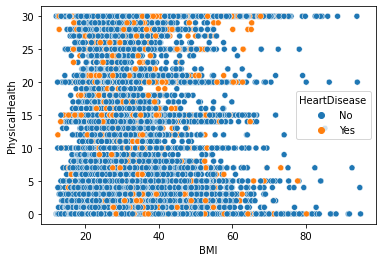

In [89]:
sns.scatterplot(data=df, x=df.BMI, y=df.PhysicalHealth, hue=df.HeartDisease)

#### We can notice that most of our outliers are of the majority class, which makes perfect sense.

### Let's first detect these outliers:

In [90]:
data = df.copy()

In [91]:
num_data=[]
for i in data.columns:
    if data[i].dtype==float :
        num_data.append(i)
print(num_data)

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


In [92]:
data[num_data]

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


In [93]:
from scipy.stats import zscore

In [94]:
Z_score= zscore(data[num_data])

In [95]:
Z_score

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.830820,-0.070301,3.183766,-1.420852
1,-1.252600,-0.438823,-0.507054,-0.057636
2,-0.287869,2.017986,3.183766,0.623971
3,-0.654281,-0.438823,-0.507054,-0.739244
4,-0.731583,3.000709,-0.507054,0.623971
...,...,...,...,...
319790,-0.159547,0.421060,-0.507054,-0.739244
319791,0.216141,-0.438823,-0.507054,-1.420852
319792,-0.649643,-0.438823,-0.507054,-0.739244
319793,0.675316,-0.438823,-0.507054,3.350402


We will need to get only the absolute values for a single comparison operation:

In [96]:
Abs_scores = np.abs(Z_score)
Abs_scores

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1.830820,0.070301,3.183766,1.420852
1,1.252600,0.438823,0.507054,0.057636
2,0.287869,2.017986,3.183766,0.623971
3,0.654281,0.438823,0.507054,0.739244
4,0.731583,3.000709,0.507054,0.623971
...,...,...,...,...
319790,0.159547,0.421060,0.507054,0.739244
319791,0.216141,0.438823,0.507054,1.420852
319792,0.649643,0.438823,0.507054,0.739244
319793,0.675316,0.438823,0.507054,3.350402


In [97]:
no_outliers = (Abs_scores<3).all(axis=1)
# A function that originally returns "True" if all elements are there and there are no missing values, but
# if we modify it a little like we did in the above code it will return "True" only when the condition is
# met.

print(no_outliers)

0         False
1          True
2         False
3          True
4         False
          ...  
319790     True
319791     True
319792     True
319793    False
319794     True
Length: 301717, dtype: bool


In [98]:
data[no_outliers]
# Now we will get only the rows with "True" values which don't have any outliers in any of their features

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


In [99]:
df.shape

(301717, 18)

In [100]:
counts = pd.DataFrame(no_outliers)
counts

,0
0,False
1,True
2,False
3,True
4,False
...,...
319790,True
319791,True
319792,True
319793,False


In [101]:
counts[(counts==False)].count()

0    38793
dtype: int64

In [102]:
# We can double check by subtracting data[no_outliers].shape[0] from the original df.shape[0]
301717-262924

38793

In [103]:
39502/301717

0.13092401157375952

#### 13% is a great deal, so we can not drop those outliers, and even if the percentage was low and we could drop them; that would be  in normal cases only, but in case of having an imbalanced data, it's recommended to keep the outliers.

---------------------------------------------------------------

## Now we can focus on the imbalancing problem:

### Let's check our data's balance:

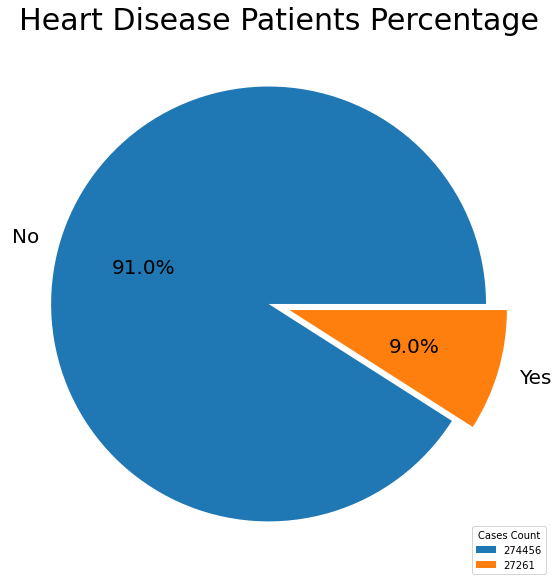

In [104]:
labels = df.HeartDisease.value_counts().index
sizes = df.HeartDisease.value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"},
        explode=[0.05, 0.05])
plt.title('Heart Disease Patients Percentage',color = 'black',fontsize = 30)
plt.legend(df.HeartDisease.value_counts(), loc = 'lower right', title = 'Cases Count')
plt.show()

In [105]:
categ_data=[]
for i in df.columns:
    if df[i].dtype==object  :
        categ_data.append (i)
print(categ_data)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


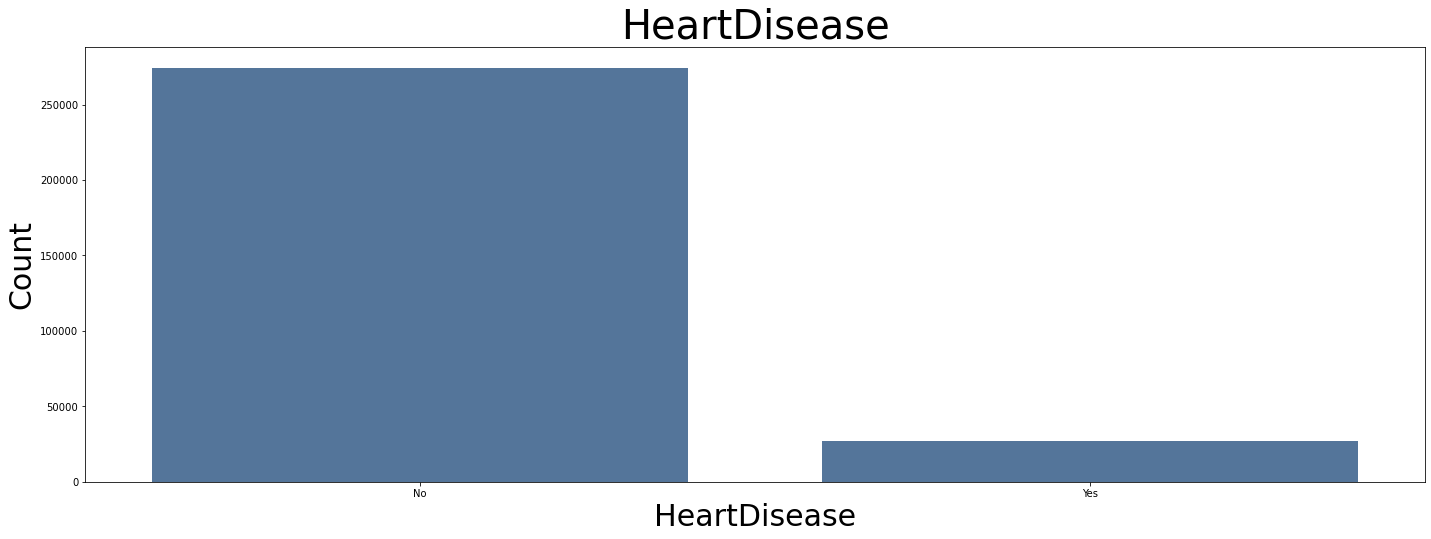

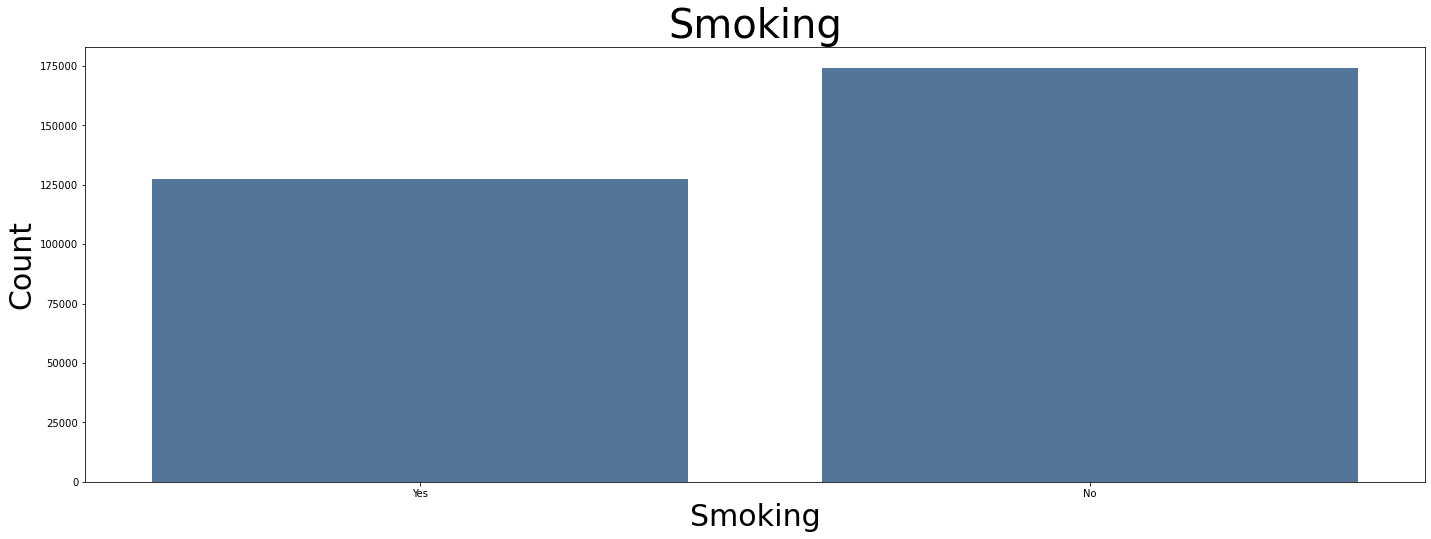

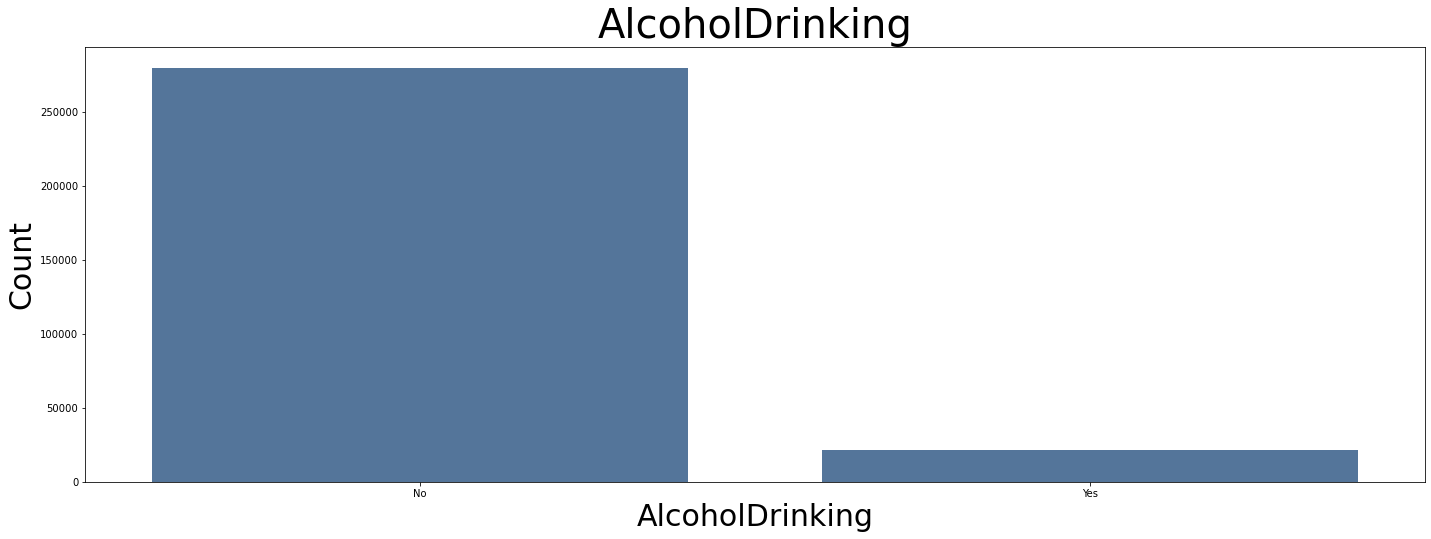

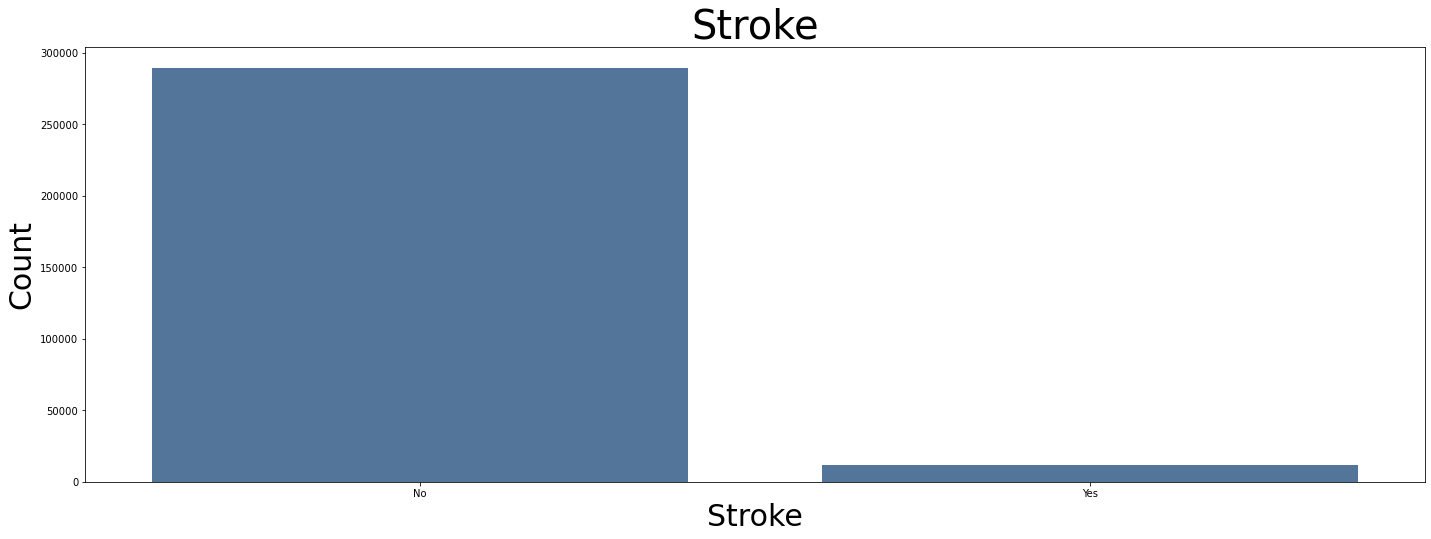

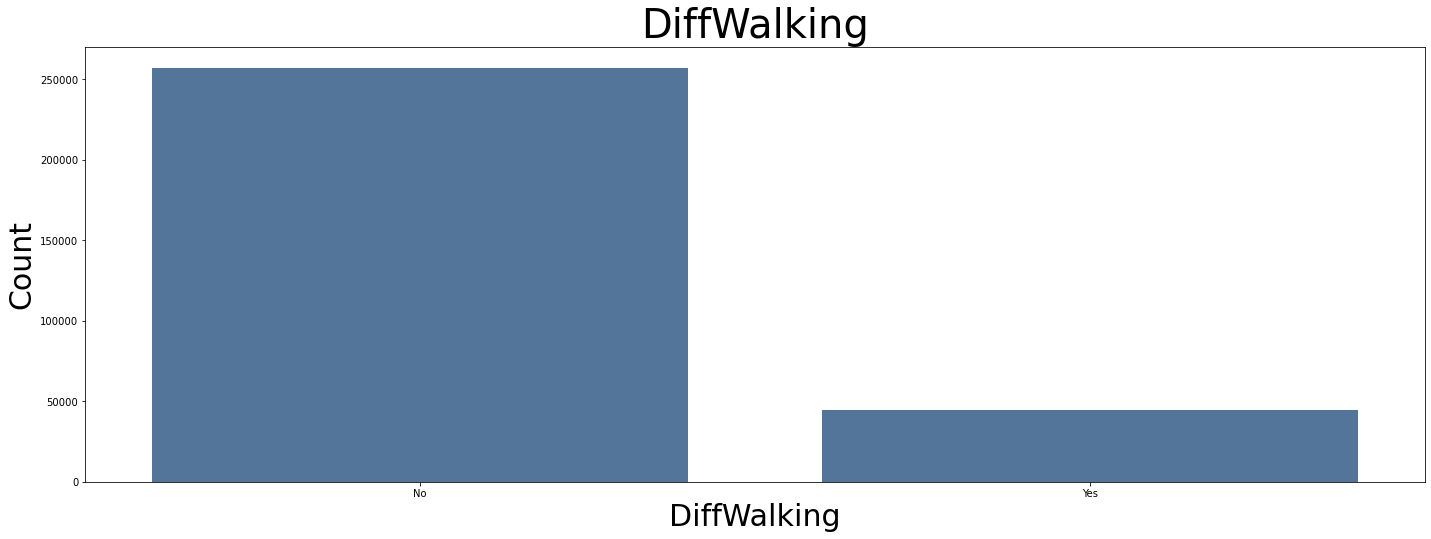

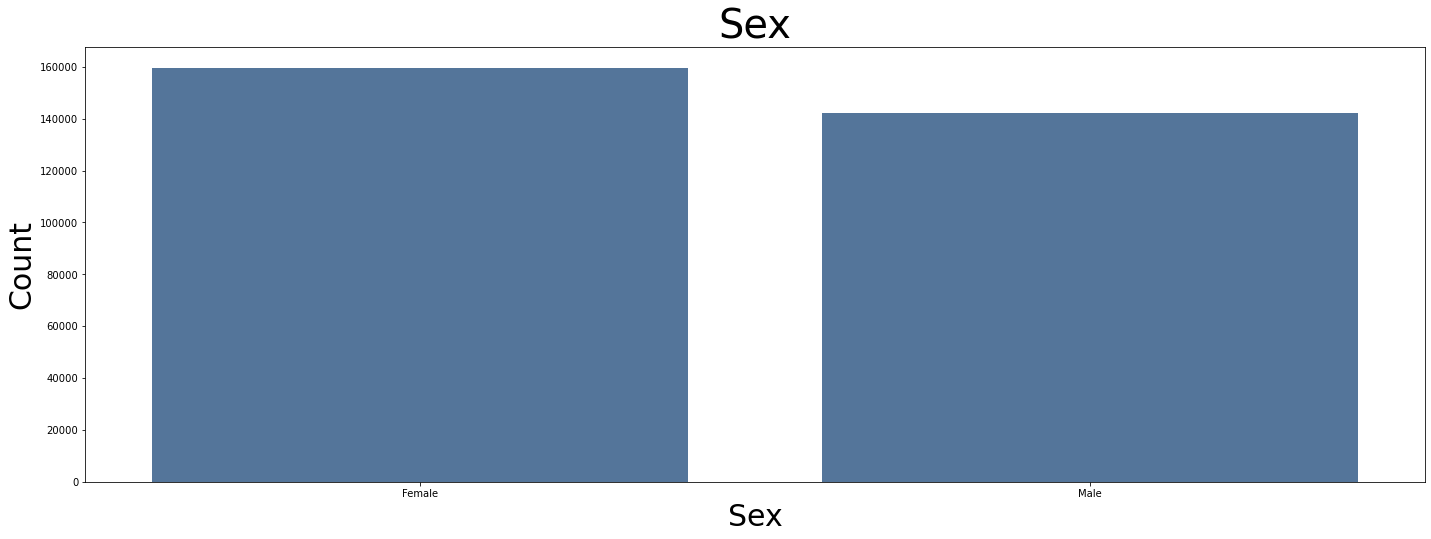

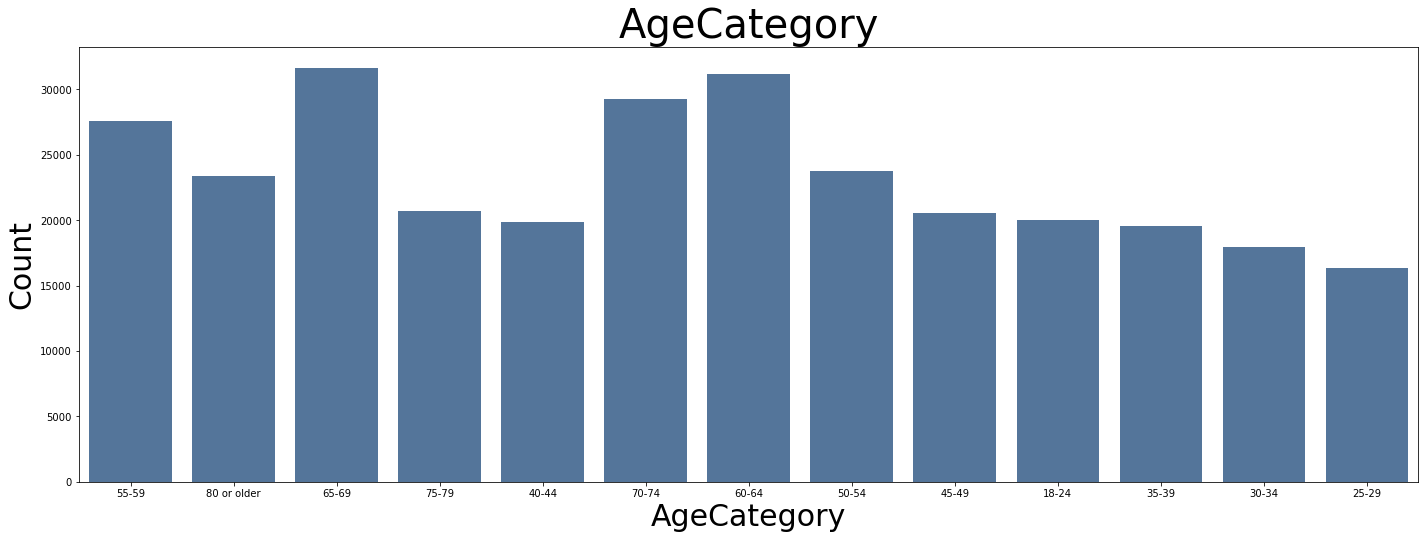

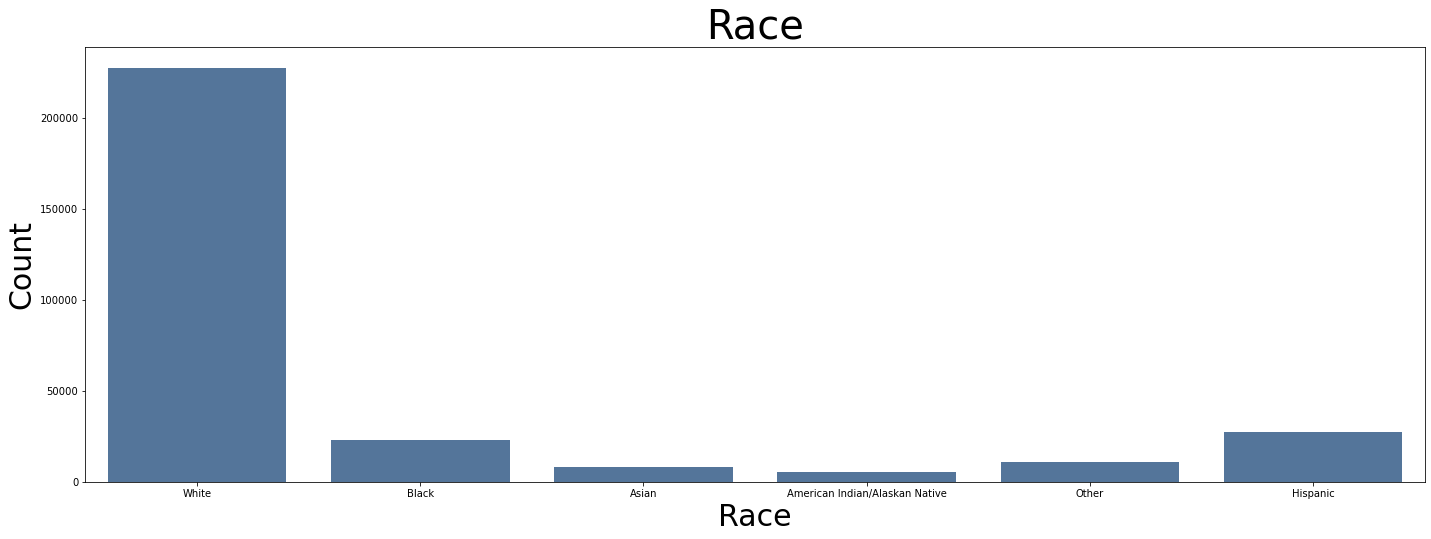

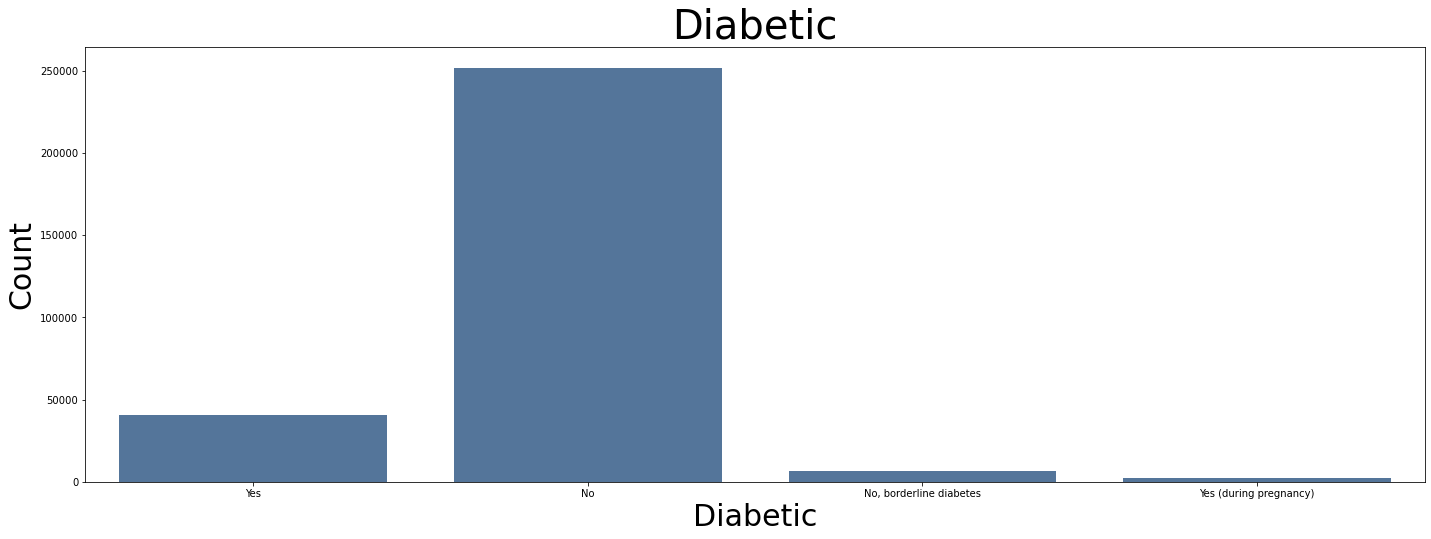

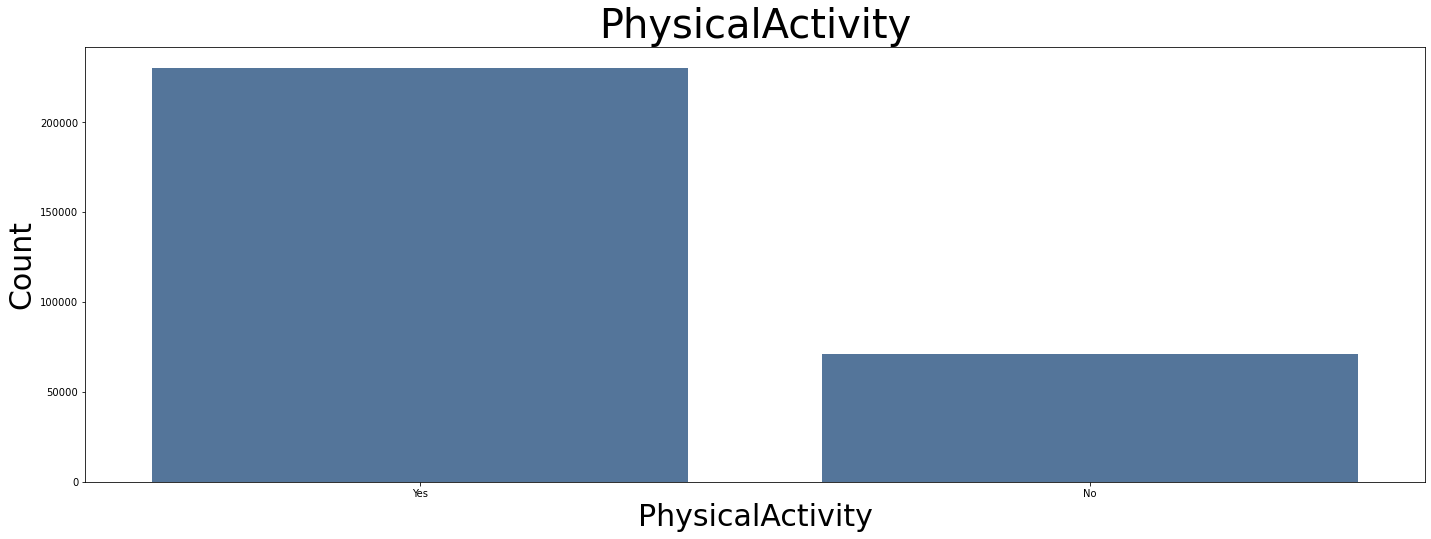

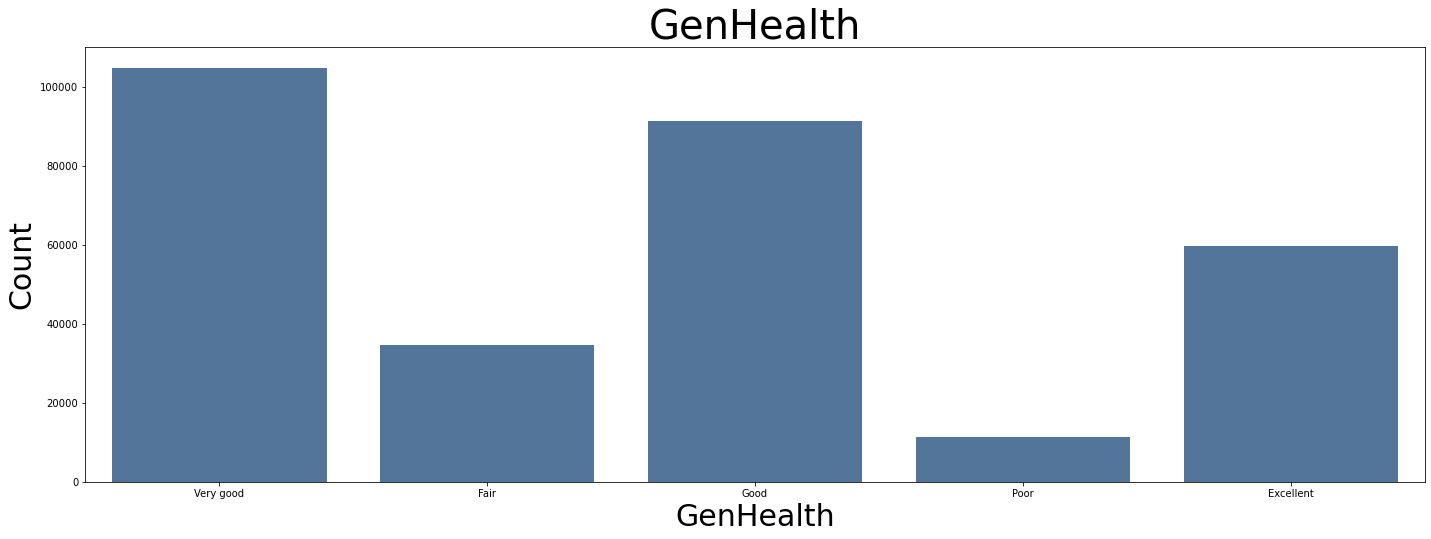

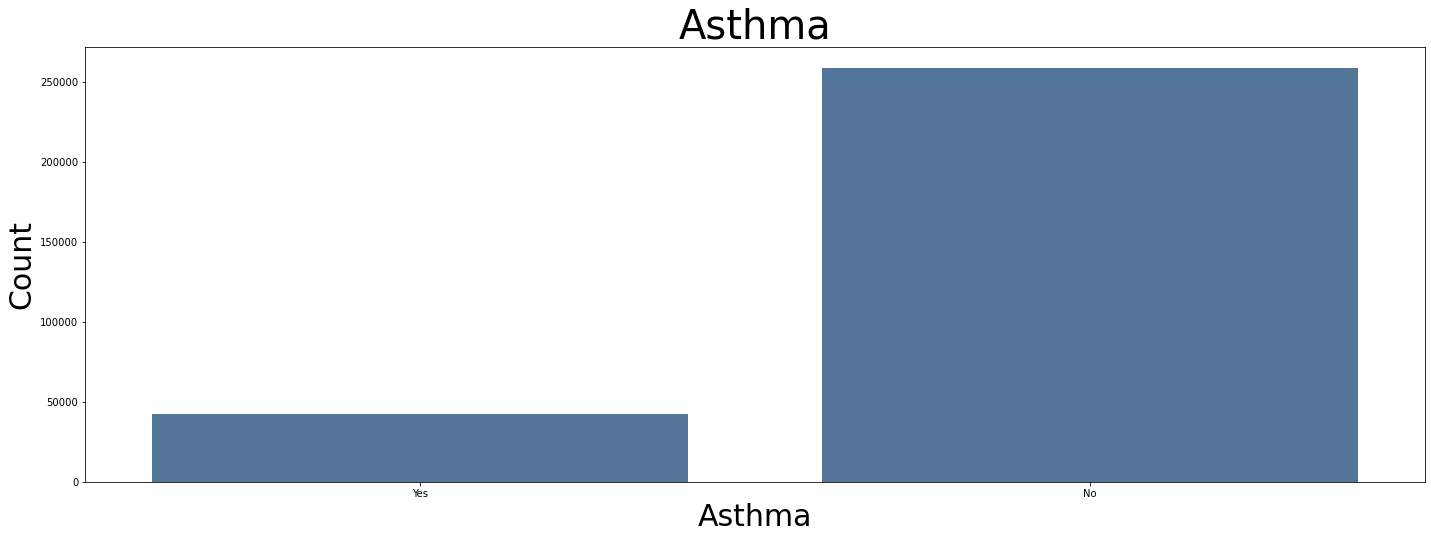

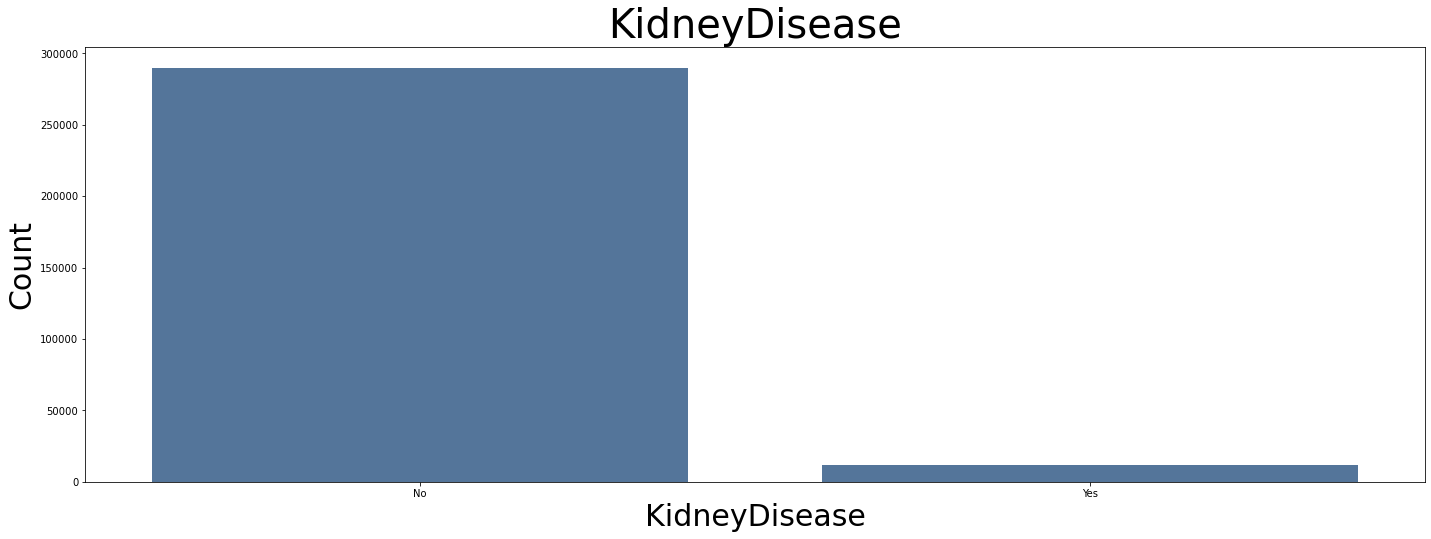

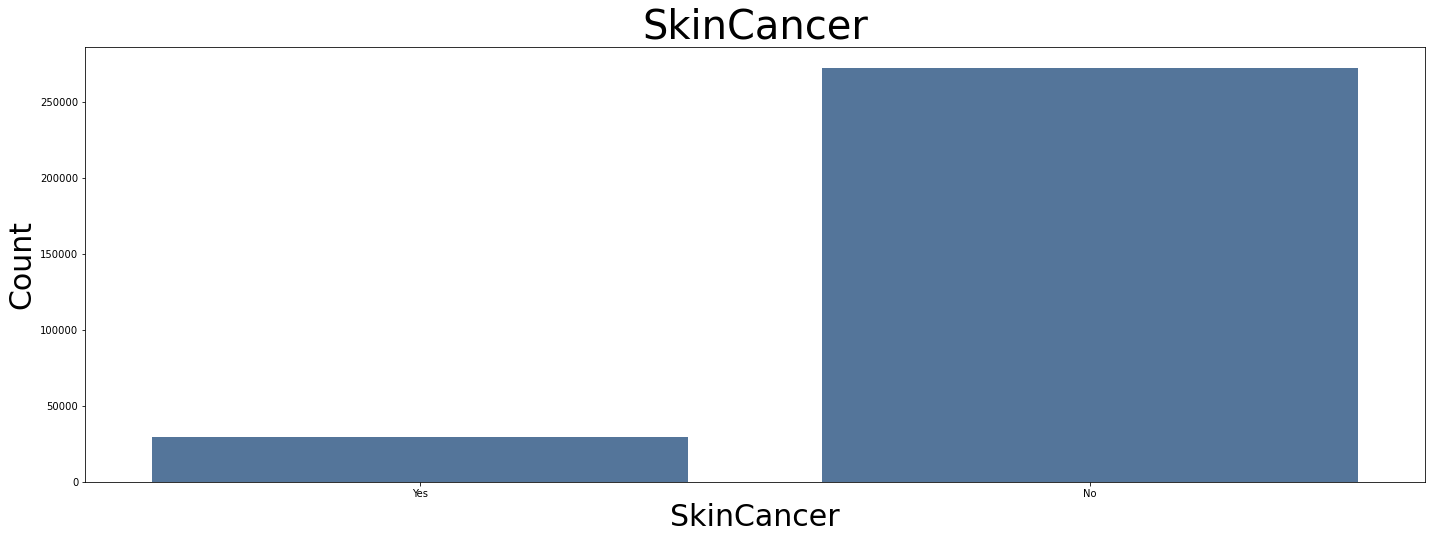

In [106]:
for ft in categ_data:
    plt.figure(figsize=(24,8))
    sns.countplot(x=df[ft],  color="#4974a5")
    plt.title(ft , fontsize=40)
    plt.xlabel(ft, fontsize=30)
    plt.ylabel("Count", fontsize=30)
    plt.show()

As we can see we have imbalanced data in so many of our features and even the target which is the most important.

### As suspected our data is imbalanced, and we need to handle this situation

### Let's first encode our categorical data:

In [107]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [108]:
for ft in categ_data:
    df[ft]=le.fit_transform(df[ft])

In [109]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDisease,301717.0,0.090353,0.286687,0.00,0.00,0.00,0.00,1.00
BMI,301717.0,28.441970,6.468134,12.02,24.03,27.41,31.65,94.85
Smoking,301717.0,0.422267,0.493921,0.00,0.00,0.00,1.00,1.00
AlcoholDrinking,301717.0,0.071527,0.257704,0.00,0.00,0.00,0.00,1.00
Stroke,301717.0,0.039984,0.195923,0.00,0.00,0.00,0.00,1.00
PhysicalHealth,301717.0,3.572298,8.140656,0.00,0.00,0.00,2.00,30.00
MentalHealth,301717.0,4.121475,8.128288,0.00,0.00,0.00,4.00,30.00
DiffWalking,301717.0,0.147009,0.354115,0.00,0.00,0.00,0.00,1.00
Sex,301717.0,0.470792,0.499147,0.00,0.00,0.00,1.00,1.00
AgeCategory,301717.0,6.509408,3.584510,0.00,4.00,7.00,9.00,12.00


### We will need to scale our features first:

In [111]:
df_scaled = df.copy()

In [112]:
# Since we have outliers in our data, let's first try the Robust scaler:
from sklearn.preprocessing import RobustScaler
rob = RobustScaler()
outliered_featuers = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]
for i in outliered_featuers:
    df_scaled[i] = rob.fit_transform(df_scaled[[i]])
df_scaled

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.418635,1,0,0,1.5,7.5,0,0,7,5,2,1,4,-1.0,1,0,1
1,0,-0.927822,0,0,1,0.0,0.0,0,0,12,5,0,1,4,0.0,0,0,0
2,0,-0.108924,1,0,0,10.0,7.5,0,1,9,5,2,1,1,0.5,1,0,0
3,0,-0.419948,0,0,0,0.0,0.0,0,0,11,5,0,0,2,-0.5,0,0,1
4,0,-0.485564,0,0,0,14.0,0.0,1,0,4,5,0,1,4,0.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.000000,1,0,0,3.5,0.0,1,1,8,3,2,0,1,-0.5,1,0,0
319791,0,0.318898,1,0,0,0.0,0.0,0,1,3,3,0,1,4,-1.0,1,0,0
319792,0,-0.416010,0,0,0,0.0,0.0,0,0,5,3,0,1,2,-0.5,0,0,0
319793,0,0.708661,0,0,0,0.0,0.0,0,0,1,3,0,0,2,2.5,0,0,0


In [113]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDisease,301717.0,0.090353,0.286687,0.000000,0.00000,0.0,0.00000,1.000000
BMI,301717.0,0.135429,0.848837,-2.019685,-0.44357,0.0,0.55643,8.850394
Smoking,301717.0,0.422267,0.493921,0.000000,0.00000,0.0,1.00000,1.000000
AlcoholDrinking,301717.0,0.071527,0.257704,0.000000,0.00000,0.0,0.00000,1.000000
Stroke,301717.0,0.039984,0.195923,0.000000,0.00000,0.0,0.00000,1.000000
PhysicalHealth,301717.0,1.786149,4.070328,0.000000,0.00000,0.0,1.00000,15.000000
MentalHealth,301717.0,1.030369,2.032072,0.000000,0.00000,0.0,1.00000,7.500000
DiffWalking,301717.0,0.147009,0.354115,0.000000,0.00000,0.0,0.00000,1.000000
Sex,301717.0,0.470792,0.499147,0.000000,0.00000,0.0,1.00000,1.000000
AgeCategory,301717.0,6.509408,3.584510,0.000000,4.00000,7.0,9.00000,12.000000


### Now, we can apply any scaler to the whole dataset, but because we don't need to scale our target in our case here, we will scale only the features, so we can do this after droping the target (while we are getting ready for the splitting stage)

In [114]:
x = df_scaled.drop(columns='HeartDisease')

In [115]:
# We will use the minmaxscaler:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [116]:
for i in x:
    x[i] = minmax.fit_transform(x[[i]])
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,0.666667,1.0,1.00,0.173913,1.0,0.0,1.0
1,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.260870,0.0,0.0,0.0
2,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,0.666667,1.0,0.25,0.304348,1.0,0.0,0.0
3,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0
4,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,1.0,0.000000,1.0,1.00,0.304348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.6,0.666667,0.0,0.25,0.217391,1.0,0.0,0.0
319791,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.6,0.000000,1.0,1.00,0.173913,1.0,0.0,0.0
319792,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0
319793,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0


In [117]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,301717.0,0.198261,0.078089,0.0,0.144996,0.185802,0.236991,1.0
Smoking,301717.0,0.422267,0.493921,0.0,0.000000,0.000000,1.000000,1.0
AlcoholDrinking,301717.0,0.071527,0.257704,0.0,0.000000,0.000000,0.000000,1.0
Stroke,301717.0,0.039984,0.195923,0.0,0.000000,0.000000,0.000000,1.0
PhysicalHealth,301717.0,0.119077,0.271355,0.0,0.000000,0.000000,0.066667,1.0
MentalHealth,301717.0,0.137382,0.270943,0.0,0.000000,0.000000,0.133333,1.0
DiffWalking,301717.0,0.147009,0.354115,0.0,0.000000,0.000000,0.000000,1.0
Sex,301717.0,0.470792,0.499147,0.0,0.000000,0.000000,1.000000,1.0
AgeCategory,301717.0,0.542451,0.298709,0.0,0.333333,0.583333,0.750000,1.0
Race,301717.0,0.873082,0.247163,0.0,1.000000,1.000000,1.000000,1.0


# Data Splitting

### Let's first split our dataset into train and test sets:

In [118]:
y = df['HeartDisease']

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

## Let's check our model before applying any oversampling or undersampling techniques:

### Let's first import the remaining packages we are going to need:

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate


# Modeling

In [122]:
def evaluate_model(models, x_train, x_test, y_train, y_test):
    compare_list = []
    for index,clf in models :
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        compare_list.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((x_train),y_train),
                           "Test_Score" : clf.score((x_test), y_test)}, name = index)))
    compare_list = pd.DataFrame(compare_list).T
    return compare_list

In [123]:
LR = LogisticRegression()
RF = RandomForestClassifier(n_estimators=4,random_state=42)
DT = DecisionTreeClassifier(random_state=0)
KNN = KNeighborsClassifier(n_neighbors=100)
XGB = XGBClassifier()

models = [('LogR', LR), ('RandF', RF), ('DTs', DT),('KNN', KNN), ('XGB', XGB)]

In [124]:
def highlight(s):
    is_max = s == s.max()
    return ['background-color: blue' if v else '' for v in is_max]

In [125]:
result_1 = evaluate_model(models, x_train, x_test, y_train, y_test)
result_1.style.apply(highlight,axis=1)

,LogR,RandF,DTs,KNN,XGB
Precision,0.716365,0.605636,0.575108,0.750186,0.710703
Recall,0.543354,0.540273,0.583992,0.517122,0.547437
F1,0.556943,0.550171,0.579060,0.511173,0.563147
Accuracy,0.910182,0.896361,0.853374,0.910646,0.909795
Train_Score,0.910337,0.968864,0.997386,0.910881,0.918405
Test_Score,0.910182,0.896361,0.853374,0.910646,0.909795


#### As we can see the results are not the best thing. So, let's jumb to the techniques in order to solve our main problem (imbalance).

# Applying Resampling Techniques

## 1st Technique: "Over-Sampling" (Randomly):
It aims to balance class distribution by randomly increasing minority class examples by replicating them.

#### There's an easier and quicker way to apply the random oversampling technique, which is importing and using the **ROSE (Random Oversampling Examples)** method from the **"imblearn"** package, as follows:

In [126]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_overR, y_overR = ros.fit_resample(x_train, y_train)

In [127]:
y_train.value_counts()

0    192118
1     19083
Name: HeartDisease, dtype: int64

In [128]:
y_overR.value_counts()

0    192118
1    192118
Name: HeartDisease, dtype: int64

In [129]:
x_train.shape

(211201, 17)

In [130]:
x_overR.shape

(384236, 17)

In [131]:
192118*2

384236

In [132]:
result_2 = evaluate_model(models, x_overR, x_test, y_overR, y_test)
result_2.style.apply(highlight,axis=1)

,LogR,RandF,DTs,KNN,XGB
Precision,0.593474,0.595988,0.571763,0.588709,0.595878
Recall,0.745168,0.564393,0.573449,0.742206,0.748124
F1,0.585943,0.574964,0.572586,0.571749,0.591318
Accuracy,0.732644,0.882838,0.857837,0.710725,0.739825
Train_Score,0.748170,0.996950,0.998563,0.771708,0.796721
Test_Score,0.732644,0.882838,0.857837,0.710725,0.739825


## 2rd Technique: "Under-Sampling" (Randomly):
It aims to balance class distribution by randomly delete majority class examples.

#### There's also an easier and quicker way to apply the random undersampling technique, using the undersampling method from the **"imblearn"** package, as follows:

In [133]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_underR, y_underR = rus.fit_resample(x_train, y_train)

In [134]:
y_underR.value_counts()

0    19083
1    19083
Name: HeartDisease, dtype: int64

In [135]:
result_3 = evaluate_model(models, x_underR, x_test, y_underR, y_test)
result_3.style.apply(highlight,axis=1)

,LogR,RandF,DTs,KNN,XGB
Precision,0.593044,0.580346,0.558382,0.589058,0.593423
Recall,0.745338,0.689057,0.664127,0.742685,0.751991
F1,0.584457,0.581649,0.524229,0.572649,0.580647
Accuracy,0.730147,0.757093,0.666755,0.711996,0.720712
Train_Score,0.752817,0.940366,0.998638,0.754991,0.815805
Test_Score,0.730147,0.757093,0.666755,0.711996,0.720712


#### These random techniques are are referred to as “naive resampling” methods because they assume nothing about the data. This makes them simple to implement and fast to execute, which is desirable for very large and complex datasets.

#### But we should know that they are not always recommended due to the duplicates that get created during the process which might cause overfitting to the model. So, we shall be aware of data leakage.



## 3rd Technique: "Over-Sampling" using SMOTE (Intelligently):


In [136]:
from imblearn.over_sampling import SMOTE

In [137]:
sm = SMOTE(random_state=42)
x_oversm, y_oversm = sm.fit_resample(x_train, y_train)

In [138]:
y_oversm.value_counts()

0    192118
1    192118
Name: HeartDisease, dtype: int64

In [139]:
result_4 = evaluate_model(models, x_oversm, x_test, y_oversm, y_test)
result_4.style.apply(highlight,axis=1)

,LogR,RandF,DTs,KNN,XGB
Precision,0.592619,0.589083,0.563915,0.585385,0.631204
Recall,0.744725,0.573885,0.584339,0.740714,0.602453
F1,0.583525,0.580233,0.571047,0.559024,0.614096
Accuracy,0.728932,0.873658,0.835974,0.689977,0.886860
Train_Score,0.752387,0.981295,0.998558,0.782103,0.919216
Test_Score,0.728932,0.873658,0.835974,0.689977,0.886860


## 4th Technique: "Under-Sampling" using Tomek Links Technique (Intelligently):

In [140]:
from imblearn.under_sampling import TomekLinks

In [141]:
tomek = TomekLinks()
x_underT, y_underT = tomek.fit_resample(x_train, y_train)

In [142]:
y_underT.value_counts()

0    184693
1     19083
Name: HeartDisease, dtype: int64

In [143]:
result_5 = evaluate_model(models, x_underT, x_test, y_underT, y_test)
result_5.style.apply(highlight,axis=1)

,LogR,RandF,DTs,KNN,XGB
Precision,0.704391,0.616912,0.580603,0.721279,0.700032
Recall,0.559891,0.559455,0.598976,0.531306,0.568056
F1,0.580856,0.573789,0.587960,0.537172,0.591386
Accuracy,0.909110,0.893389,0.848878,0.910303,0.908436
Train_Score,0.909199,0.970939,0.997291,0.909538,0.918175
Test_Score,0.909110,0.893389,0.848878,0.910303,0.908436


## 5th Technique: Combining both Over-Sampling "SMOTE" and Under-Sampling "Tomek Links" (Intelligently): Using "SMOTETomek"

In [144]:
from imblearn.combine import SMOTETomek

In [145]:
smT = SMOTETomek(random_state=42)

In [146]:
x_smT, y_smT = smT.fit_resample(x_train, y_train)

In [147]:
y_smT.value_counts()

0    186568
1    186568
Name: HeartDisease, dtype: int64

In [148]:
result_6 = evaluate_model(models, x_smT, x_test, y_smT, y_test)
result_6.style.apply(highlight,axis=1)

,LogR,RandF,DTs,KNN,XGB
Precision,0.592444,0.590166,0.568065,0.585185,0.631059
Recall,0.744858,0.575826,0.589906,0.740319,0.606306
F1,0.582854,0.581905,0.575776,0.558552,0.616681
Accuracy,0.727772,0.873382,0.837686,0.689359,0.885755
Train_Score,0.760334,0.985290,0.998518,0.789120,0.927914
Test_Score,0.727772,0.873382,0.837686,0.689359,0.885755


# Conclusion

### According to our results, we conclude that:
- The SMOTE technique, and the combination technique (SMOTETOMEK) were the best approaches.
- We found that both XGB and Logistic Regression had the best results, regarding both the accuracy and the recall (with about 90% accuracy and 75% recall).
- Our original data without any resampling, had the highest and most misleading accuracy as expected.